# Analysis of GAIA Stars in *legacypipe*

Simple notebook to examine the GAIA priors.

In [1]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.4, palette='Set2')

In [3]:
%matplotlib inline

In [4]:
catfile = '/global/u1/d/dstn/legacypipe/py/gaia-stars/tractor/297/tractor-2970p600.fits'
cat = Table.read(catfile)
cat

release,brickid,brickname,objid,brick_primary,type,ra,dec,ra_ivar,dec_ivar,bx,by,dchisq [5],ebv,mjd_min,mjd_max,flux_u,flux_g,flux_r,flux_i,flux_z,flux_Y,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_u,flux_ivar_g,flux_ivar_r,flux_ivar_i,flux_ivar_z,flux_ivar_Y,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,apflux_u [8],apflux_g [8],apflux_r [8],apflux_i [8],apflux_z [8],apflux_Y [8],apflux_resid_u [8],apflux_resid_g [8],apflux_resid_r [8],apflux_resid_i [8],apflux_resid_z [8],apflux_resid_Y [8],apflux_ivar_u [8],apflux_ivar_g [8],apflux_ivar_r [8],apflux_ivar_i [8],apflux_ivar_z [8],apflux_ivar_Y [8],mw_transmission_u,mw_transmission_g,mw_transmission_r,mw_transmission_i,mw_transmission_z,mw_transmission_Y,mw_transmission_w1,mw_transmission_w2,mw_transmission_w3,mw_transmission_w4,nobs_u,nobs_g,nobs_r,nobs_i,nobs_z,nobs_Y,nobs_w1,nobs_w2,nobs_w3,nobs_w4,rchisq_u,rchisq_g,rchisq_r,rchisq_i,rchisq_z,rchisq_Y,rchisq_w1,rchisq_w2,rchisq_w3,rchisq_w4,fracflux_u,fracflux_g,fracflux_r,fracflux_i,fracflux_z,fracflux_Y,fracflux_w1,fracflux_w2,fracflux_w3,fracflux_w4,fracmasked_u,fracmasked_g,fracmasked_r,fracmasked_i,fracmasked_z,fracmasked_Y,fracin_u,fracin_g,fracin_r,fracin_i,fracin_z,fracin_Y,anymask_u,anymask_g,anymask_r,anymask_i,anymask_z,anymask_Y,allmask_u,allmask_g,allmask_r,allmask_i,allmask_z,allmask_Y,wisemask_w1,wisemask_w2,psfsize_u,psfsize_g,psfsize_r,psfsize_i,psfsize_z,psfsize_Y,psfdepth_u,psfdepth_g,psfdepth_r,psfdepth_i,psfdepth_z,psfdepth_Y,galdepth_u,galdepth_g,galdepth_r,galdepth_i,galdepth_z,galdepth_Y,wise_coadd_id,lc_flux_w1 [7],lc_flux_w2 [7],lc_flux_ivar_w1 [7],lc_flux_ivar_w2 [7],lc_nobs_w1 [7],lc_nobs_w2 [7],lc_fracflux_w1 [7],lc_fracflux_w2 [7],lc_rchisq_w1 [7],lc_rchisq_w2 [7],lc_mjd_w1 [7],lc_mjd_w2 [7],fracdev,fracdev_ivar,shapeexp_r,shapeexp_r_ivar,shapeexp_e1,shapeexp_e1_ivar,shapeexp_e2,shapeexp_e2_ivar,shapedev_r,shapedev_r_ivar,shapedev_e1,shapedev_e1_ivar,shapedev_e2,shapedev_e2_ivar
,,,,,,deg,deg,1/deg^2,1/deg^2,,,,mag,,,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,arcsec,arcsec,arcsec,arcsec,arcsec,arcsec,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,1/nanomaggy^2,,nanomaggy,nanomaggy,1/nanomaggy^2,1/nanomaggy^2,,,,,,,,,,,arcsec,1/arcsec^2,,,,,arcsec,1/arcsec^2,,,,
int16,int32,str8,int32,bool,str4,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str8,float32,float32,float32,float32,int16,int16,float32,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,flo

In [5]:
colors = dict()
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for band in ('g', 'r', 'z'):
        colors[band] = 22.5 - 2.5 * np.log10(cat['flux_{}'.format(band)])
colors['gr'] = colors['g'] - colors['r']
colors['rz'] = colors['r'] - colors['z']

In [6]:
objtype = np.char.strip(cat['type'])
ispsf = (objtype == 'PSF') * np.isfinite(colors['r'])
isgaia = (objtype == 'GAIA') * np.isfinite(colors['r'])

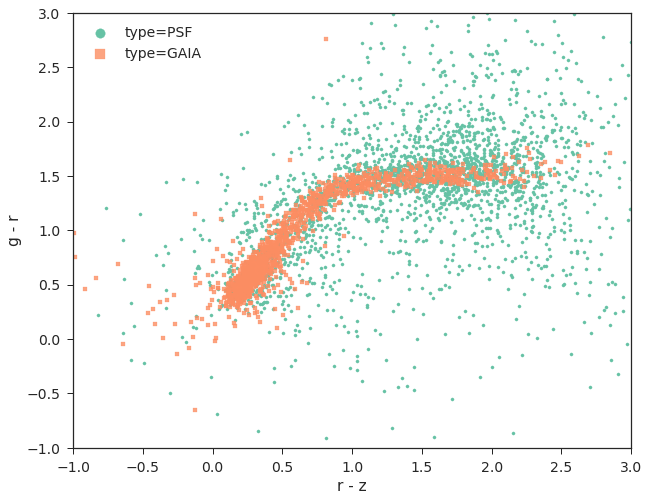

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(colors['rz'][ispsf], colors['gr'][ispsf], s=10, 
           label='type=PSF')
ax.scatter(colors['rz'][isgaia], colors['gr'][isgaia], s=10, 
           alpha=0.8, label='type=GAIA', marker='s')
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 3)
ax.set_xlabel('r - z')
ax.set_ylabel('g - r')
ax.legend(loc='upper left', markerscale=3)

(10, 27)

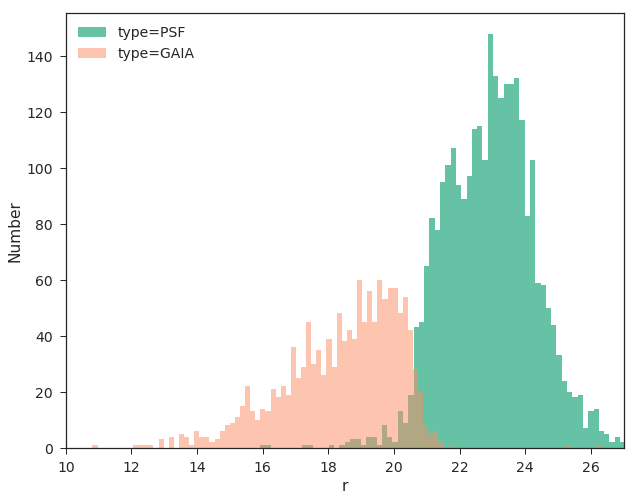

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = ax.hist(colors['r'][ispsf], bins=100, label='type=PSF')
_ = ax.hist(colors['r'][isgaia], bins=100, label='type=GAIA', alpha=0.5)
ax.legend(loc='upper left')
ax.set_xlabel('r')
ax.set_ylabel('Number')
ax.set_xlim(10, 27)

Print out coordinates for the first 20 stars and grab DR6 cutouts from the [DECaLS Image List Tool](https://yymao.github.io/decals-image-list-tool).

In [9]:
ngaia = np.count_nonzero(isgaia)
for ii in range(20):
    print(cat['ra'].data[isgaia][ii], cat['dec'].data[isgaia][ii])

297.33934092 59.8746087735
297.348405317 59.876763359
297.330265611 59.8734734809
297.334280793 59.8710741501
297.326568029 59.8710053727
297.327871425 59.8700506313
297.098795895 59.8736775704
297.090171781 59.8721878059
297.086054864 59.8723068669
297.090433624 59.8703440653
297.096289783 59.8772975828
297.111755437 59.8732603468
297.010921473 59.8722812687
297.01382616 59.8752666774
297.015835831 59.8743774271
296.878525009 59.8710655734
296.877960845 59.8736318507
297.244060278 59.8748078724
297.244982266 59.8721669132
297.245593785 59.8737013959
